#### General Model with simple train test splitting method (80-20%)

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv("Data.csv")
# Step 2: Normalize the Data

X = data.drop('HV', axis=1)
y = data['HV']

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
#model = xgb.XGBRegressor(objective='reg:squarederror')

model = xgb.XGBRegressor(
    n_estimators=200,         # Increase from default for more trees
    learning_rate=0.1,        # Lower learning rate
    max_depth=6,              # Controls complexity
    subsample=0.8,            # Use 80% of training samples per tree
    colsample_bytree=0.8,     # Use 80% of features per tree
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=1.0,           # L2 regularization
    gamma=0.1,                # Minimum loss reduction for a split
    random_state=42           # Ensures reproducibility
)



model.fit(X_train, y_train)


# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


In [2]:
train_mae = metrics.mean_absolute_error(y_train, train_preds)
test_mae = metrics.mean_absolute_error(y_test, test_preds)

train_mse = metrics.mean_squared_error(y_train, train_preds)
test_mse = metrics.mean_squared_error(y_test, test_preds)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = metrics.r2_score(y_train, train_preds)
test_r2 = metrics.r2_score(y_test, test_preds)

print(f"Training MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")
print(f"Training MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
print(f"Training RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")


Training MAE: 0.072, Test MAE: 0.082
Training MSE: 0.008, Test MSE: 0.009
Training RMSE: 0.087, Test RMSE: 0.096
Training R²: 0.623, Test R²: 0.500


In [3]:
# View the default hyperparameters of the XGBoost model
print("Model Hyperparameters:", model.get_params())


Model Hyperparameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [4]:
for i in test_preds:
    print(i, end=', ')

0.34316036, 0.30376783, 0.46930653, 0.4529469, 0.3209155, 0.30376783, 0.43462357, 0.42224607, 0.4529469, 0.49091616, 0.4529469, 0.49499595, 0.4021772, 0.3388715, 0.48650104, 0.32483706, 0.4000675, 0.38715878, 0.45383704, 0.32793835, 0.30376783, 0.4230766, 0.39011425, 0.51727194, 0.4587205, 0.35449478, 0.37647638, 0.46969727, 0.32483706, 0.32793835, 0.42378685, 0.43873012, 0.32469973, 0.48650104, 0.38422173, 

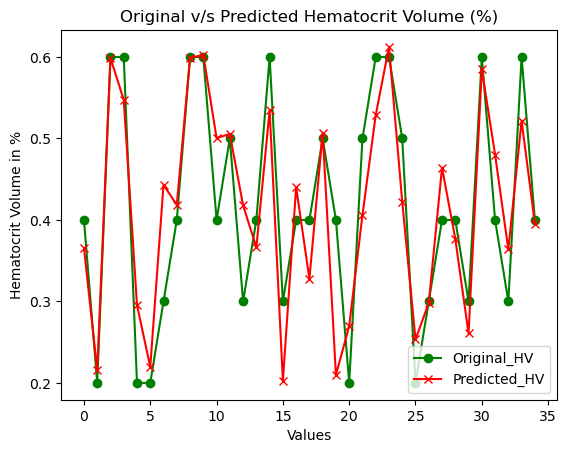

In [5]:
Original_HV = [0.4, 0.2, 0.6, 0.6, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.4, 0.5, 0.3, 0.4, 0.6, 0.3, 0.4, 0.4, 0.5, 0.4, 0.2, 0.5, 0.6, 0.6, 0.5, 0.2, 0.3, 0.4, 0.4, 0.3, 0.6, 0.4, 0.3, 0.6, 0.4]
Predicted_HV = [0.36577374, 0.21570809, 0.59876776, 0.5474414, 0.29547754, 0.21963763, 0.44309348, 0.41845462, 0.59869933, 0.602685, 0.50045455, 0.50542164, 0.41788208, 0.36629412, 0.53453285, 0.20281103, 0.44028428, 0.32764953, 0.5070343, 0.20973645, 0.2698483, 0.40596464, 0.52857786, 0.6123411, 0.422322, 0.25333074, 0.2982436, 0.46418422, 0.3769077, 0.26070598, 0.5848459, 0.4802416, 0.3638173, 0.52181995, 0.39557734]

# Plot Graph between original vs predicted vaues
plt.plot(Original_HV, color="green", label="Original_HV", marker='o' )
plt.plot(Predicted_HV, color="red", label="Predicted_HV", marker='x')
plt.title("Original v/s Predicted Hematocrit Volume (%)")
plt.xlabel("Values")
plt.ylabel("Hematocrit Volume in %")
plt.legend()
plt.show()

In [6]:
import numpy as np

# Assuming 'y_test' are the actual values and 'y_pred' are the predicted values
y_test = np.array([y_test])  # Replace with actual test set
y_pred = np.array([test_preds])  # Replace with your model's predictions

# Margin of Deviation
margin_of_deviation = np.abs(y_test - y_pred)

# Relative Error (in percentage)
relative_error = (margin_of_deviation / y_test) * 100

# Print results
print("Margin of Deviation:", margin_of_deviation)
print("Relative Error (%):", relative_error)

#average
print("Average value of Margin of Deviation:", np.mean(margin_of_deviation))
print("Average value of Relative Error (%):", np.mean(relative_error))

Margin of Deviation: [[5.68396389e-02 1.03767830e-01 1.30693471e-01 1.47053099e-01
  1.20915490e-01 1.03767830e-01 1.34623569e-01 2.22460687e-02
  1.47053099e-01 1.09083837e-01 5.29469013e-02 5.00404835e-03
  1.02177215e-01 6.11284912e-02 1.13498962e-01 2.48370588e-02
  6.75082207e-05 1.28412187e-02 4.61629629e-02 7.20616519e-02
  1.03767830e-01 7.69234002e-02 2.09885752e-01 8.27280641e-02
  4.12794948e-02 1.54494780e-01 7.64763772e-02 6.96972668e-02
  7.51629412e-02 2.79383481e-02 1.76213151e-01 3.87301207e-02
  2.46997297e-02 1.13498962e-01 1.57782674e-02]]
Relative Error (%): [[1.42099097e+01 5.18839151e+01 2.17822452e+01 2.45088498e+01
  6.04577452e+01 5.18839151e+01 4.48745231e+01 5.56151718e+00
  2.45088498e+01 1.81806395e+01 1.32367253e+01 1.00080967e+00
  3.40590715e+01 1.52821228e+01 1.89164937e+01 8.27901959e+00
  1.68770552e-02 3.21030468e+00 9.23259258e+00 1.80154130e+01
  5.18839151e+01 1.53846800e+01 3.49809587e+01 1.37880107e+01
  8.25589895e+00 7.72473902e+01 2.54921257

<Figure size 9600x7200 with 0 Axes>

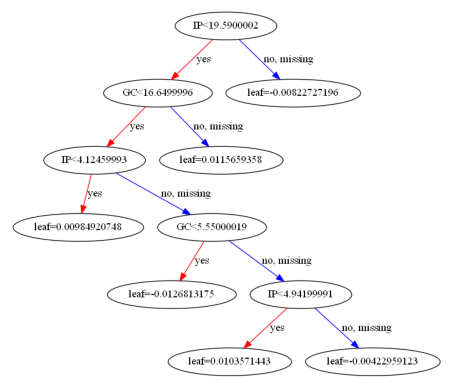

Instance 1: Predicted Value = 0.3432
Instance 2: Predicted Value = 0.3038
Instance 3: Predicted Value = 0.4693
Instance 4: Predicted Value = 0.4529
Instance 5: Predicted Value = 0.3209
Instance 6: Predicted Value = 0.3038
Instance 7: Predicted Value = 0.4346
Instance 8: Predicted Value = 0.4222
Instance 9: Predicted Value = 0.4529
Instance 10: Predicted Value = 0.4909
Instance 11: Predicted Value = 0.4529
Instance 12: Predicted Value = 0.4950
Instance 13: Predicted Value = 0.4022
Instance 14: Predicted Value = 0.3389
Instance 15: Predicted Value = 0.4865
Instance 16: Predicted Value = 0.3248
Instance 17: Predicted Value = 0.4001
Instance 18: Predicted Value = 0.3872
Instance 19: Predicted Value = 0.4538
Instance 20: Predicted Value = 0.3279
Instance 21: Predicted Value = 0.3038
Instance 22: Predicted Value = 0.4231
Instance 23: Predicted Value = 0.3901
Instance 24: Predicted Value = 0.5173
Instance 25: Predicted Value = 0.4587
Instance 26: Predicted Value = 0.3545
Instance 27: Predicte

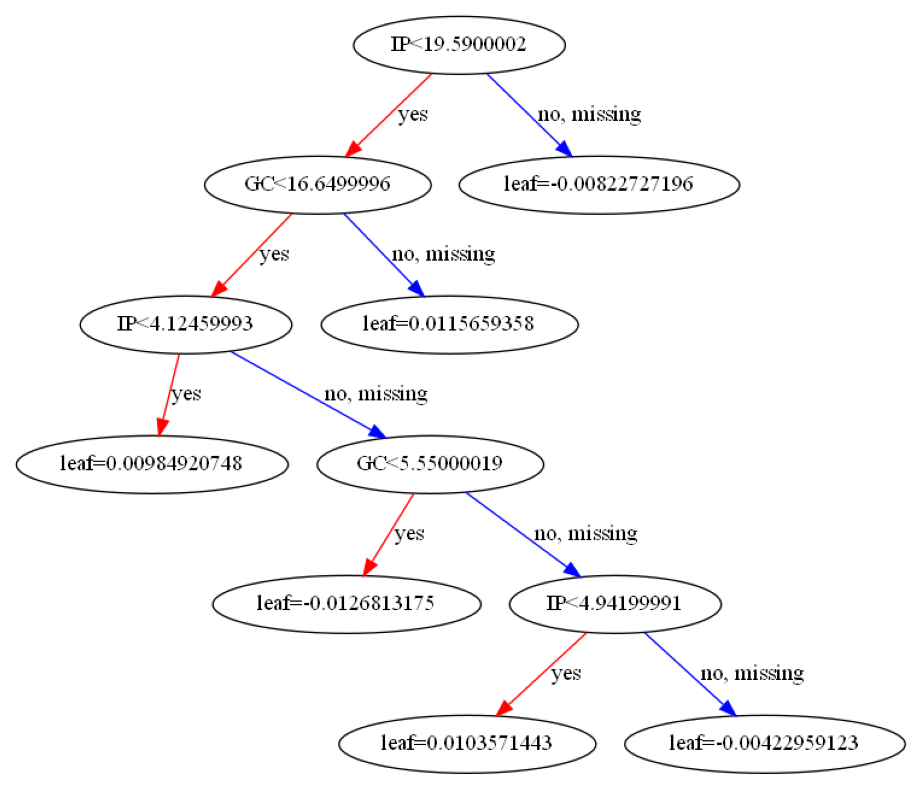

In [7]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot a specific tree (e.g., tree 0)
plt.figure(figsize=(96, 72))  # Adjust the figsize to make the plot bigger
xgb.plot_tree(model, num_trees=0, rankdir='UD')  # 'LR' for left-to-right orientation
plt.show()

fig = plt.figure(figsize=(20, 10))
xgb.plot_tree(model, num_trees=0, ax=fig.gca())
plt.savefig('xgboost_tree.png', dpi=300)

# Predict values for the test set
predictions = model.predict(X_test)

# Print predicted values for each instance
for i, pred in enumerate(predictions):
    print(f"Instance {i+1}: Predicted Value = {pred:.4f}")


In [8]:
# Export tree to Graphviz
graph = xgb.to_graphviz(model, num_trees=0)

# Save as .dot or render directly
graph.render("xgboost_tree")

'xgboost_tree.pdf'

In [9]:
import shap

# Create a SHAP explainer for the model
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Print SHAP values for each instance
for i in range(len(X_test)):
    print(f"Instance {i+1} SHAP values:")
    for feature_name, shap_value in zip(X_test.columns, shap_values[i].values):
        print(f"{feature_name}: {shap_value:.4f}")
    print()  # Blank line between instances


Instance 1 SHAP values:
GC: -0.0075
TP: -0.0350
IP: -0.0093

Instance 2 SHAP values:
GC: 0.0125
TP: -0.0203
IP: -0.0833

Instance 3 SHAP values:
GC: -0.0075
TP: 0.0711
IP: 0.0107

Instance 4 SHAP values:
GC: -0.0115
TP: -0.0227
IP: 0.0922

Instance 5 SHAP values:
GC: -0.0249
TP: -0.0350
IP: -0.0142

Instance 6 SHAP values:
GC: 0.0125
TP: -0.0203
IP: -0.0833

Instance 7 SHAP values:
GC: -0.0115
TP: -0.0410
IP: 0.0922

Instance 8 SHAP values:
GC: -0.0137
TP: -0.0410
IP: 0.0820

Instance 9 SHAP values:
GC: -0.0115
TP: -0.0227
IP: 0.0922

Instance 10 SHAP values:
GC: -0.0040
TP: 0.0608
IP: 0.0392

Instance 11 SHAP values:
GC: -0.0115
TP: -0.0227
IP: 0.0922

Instance 12 SHAP values:
GC: 0.0201
TP: 0.0711
IP: 0.0088

Instance 13 SHAP values:
GC: -0.0075
TP: 0.0082
IP: 0.0066

Instance 14 SHAP values:
GC: -0.0075
TP: -0.0427
IP: -0.0058

Instance 15 SHAP values:
GC: -0.0075
TP: 0.0883
IP: 0.0107

Instance 16 SHAP values:
GC: -0.0075
TP: -0.0533
IP: -0.0093

Instance 17 SHAP values:
GC: -0.019

In [10]:
# Access the underlying Booster object from the XGBRegressor model
booster = model.get_booster()

# Get the leaf indices for each instance in the test set
leaf_indices = booster.predict(xgb.DMatrix(X_test), pred_leaf=True)

# Print the leaf index of each instance for each tree
for i, leaf in enumerate(leaf_indices):
    print(f"Instance {i+1} Leaf Indices: {leaf}")



Instance 1 Leaf Indices: [10.  9.  1.  6.  3.  1.  4.  4.  3.  4.  1.  4.  1.  6.  0.  0.  3.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
Instance 2 Leaf Indices: [2. 2. 1. 2. 2. 1. 4. 4. 4. 4. 2. 4. 1. 2. 0. 0. 6. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

<Figure size 1000x800 with 0 Axes>

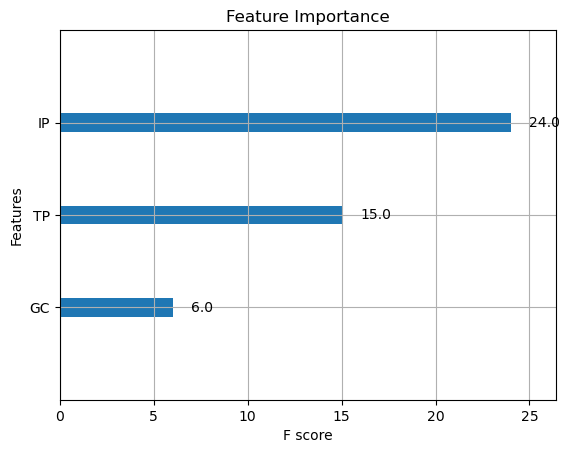

In [11]:
# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(booster, importance_type='weight')
plt.title("Feature Importance")
plt.show()


In [12]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("Data.csv")

# Define features and target variable
X = data.drop('HV', axis=1)  # Features
y = data['HV']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
model.fit(X_train, y_train)

# Create a SHAP explainer for the model
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values for a specific instance (e.g., the first instance in the test set)
shap.initjs()

# The shap_values object is already an Explanation object, so no need to index it
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0,:])


## Confidence Interval for 95%

In [13]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of bootstrap samples
n_iterations = 1000
n_size = int(len(X_train) * 0.8)

# Arrays to store bootstrap predictions
bootstrap_preds = np.zeros((n_iterations, len(X_test)))

# Perform bootstrapping
for i in range(n_iterations):
    # Resample the data
    X_resample, y_resample = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    # Train model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_resample, y_resample)
    
    # Predict on the test set
    bootstrap_preds[i, :] = model.predict(X_test)

# Calculate the mean and standard deviation of the predictions
mean_preds = np.mean(bootstrap_preds, axis=0)
std_preds = np.std(bootstrap_preds, axis=0)

# Define confidence level
confidence_level = 0.95
z_score = 1.96  # For 95% confidence

# Calculate the confidence intervals
lower_bound = mean_preds - z_score * std_preds
upper_bound = mean_preds + z_score * std_preds

# Print the confidence intervals for the first 5 test predictions
for i in range(5):
    print(f"Prediction: {mean_preds[i]:.2f}, Confidence Interval: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")


Prediction: 0.32, Confidence Interval: [0.20, 0.45]
Prediction: 0.23, Confidence Interval: [0.16, 0.30]
Prediction: 0.58, Confidence Interval: [0.51, 0.64]
Prediction: 0.57, Confidence Interval: [0.50, 0.65]
Prediction: 0.27, Confidence Interval: [0.18, 0.36]


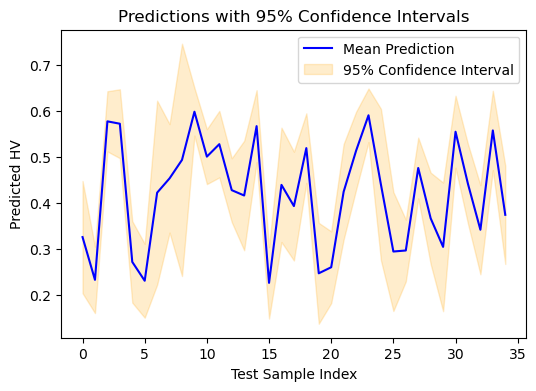

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(len(mean_preds)), mean_preds, 'b', label='Mean Prediction')
plt.fill_between(range(len(mean_preds)), lower_bound, upper_bound, color='orange', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted HV')
plt.title('Predictions with 95% Confidence Intervals')
plt.legend()
plt.show()

## K-Fold Cross_validation Model

#### Import packages

In [15]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

#### Load Dataset

In [16]:
data = pd.read_csv("Data.csv")
# Step 2: Normalize the Data

X = data.drop('HV', axis=1)
y = data['HV']

#### Create XGBoost Regression Model

In [17]:
#model = xgb.XGBRegressor(objective='reg:squarederror')
model = xgb.XGBRegressor(
    n_estimators=200,         # Increase from default for more trees
    learning_rate=0.1,        # Lower learning rate
    max_depth=6,              # Controls complexity
    subsample=0.8,            # Use 80% of training samples per tree
    colsample_bytree=0.8,     # Use 80% of features per tree
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=1.0,           # L2 regularization
    gamma=0.1,                # Minimum loss reduction for a split
    random_state=42           # Ensures reproducibility
)



#### Define the number of folds for cross-validation

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### Perform k-fold cross-validate

In [19]:
# For R-squared Error
cv_results = cross_val_score(model, X, y, cv=kf, scoring='r2')
mean_r2 = np.mean(cv_results)
std_r2 = np.std(cv_results)

# For mean squared error
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
# Convert negative MSE to positive MSE
cv_scores = -cv_scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

# for Root mean squared error
cv_rmse_scores = np.sqrt(cv_scores)
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

#### Evaluation Metrics

In [20]:
print(f'Cross-Validated R²: {mean_r2:.2f} ± {std_r2:.2f}')

Cross-Validated R²: 0.47 ± 0.07


In [21]:
print(f'Cross-Validated MSE: {mean_mse:.2f} ± {std_mse:.2f}')


Cross-Validated MSE: 0.01 ± 0.00


In [22]:
print(f'Cross-Validated RMSE: {mean_rmse:.2f} ± {std_rmse:.2f}')

Cross-Validated RMSE: 0.10 ± 0.01


## Prediction

In [23]:
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [24]:
test_preds

array([0.34316036, 0.30376783, 0.46930653, 0.4529469 , 0.3209155 ,
       0.30376783, 0.43462357, 0.42224607, 0.4529469 , 0.49091616,
       0.4529469 , 0.49499595, 0.4021772 , 0.3388715 , 0.48650104,
       0.32483706, 0.4000675 , 0.38715878, 0.45383704, 0.32793835,
       0.30376783, 0.4230766 , 0.39011425, 0.51727194, 0.4587205 ,
       0.35449478, 0.37647638, 0.46969727, 0.32483706, 0.32793835,
       0.42378685, 0.43873012, 0.32469973, 0.48650104, 0.38422173],
      dtype=float32)

In [25]:
np.array(y_test)

array([0.4, 0.2, 0.6, 0.6, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.4, 0.5, 0.3,
       0.4, 0.6, 0.3, 0.4, 0.4, 0.5, 0.4, 0.2, 0.5, 0.6, 0.6, 0.5, 0.2,
       0.3, 0.4, 0.4, 0.3, 0.6, 0.4, 0.3, 0.6, 0.4])